# Linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
boston = load_boston()

In [64]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#Analysing what type of relationship exist between all the independent variable and dependent variable
#Data Visualization

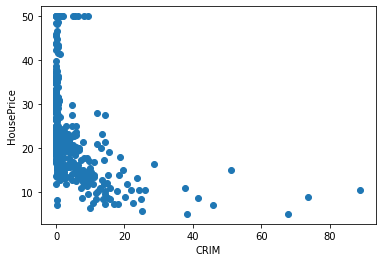

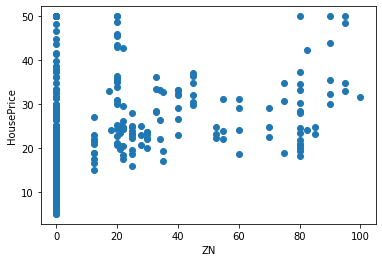

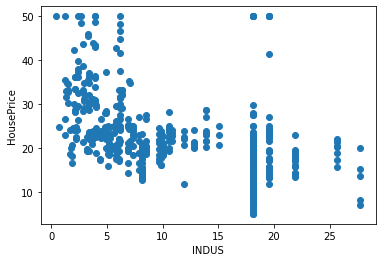

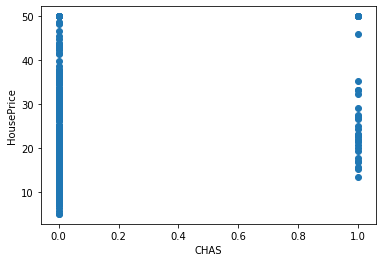

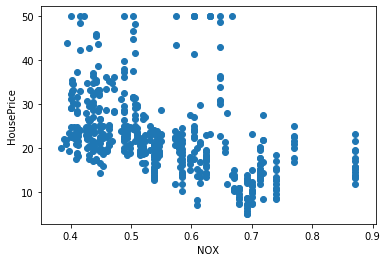

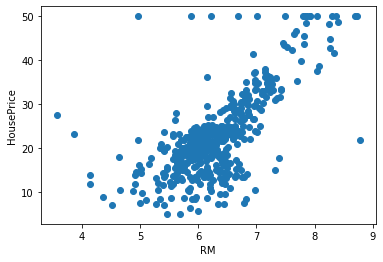

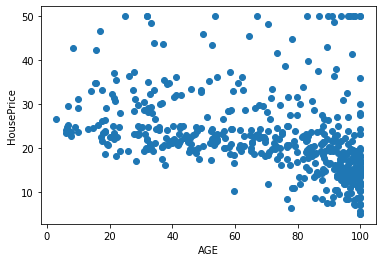

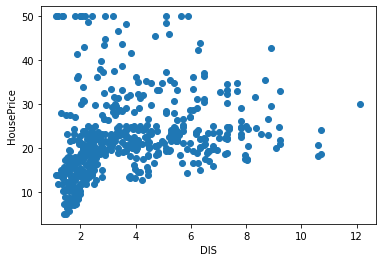

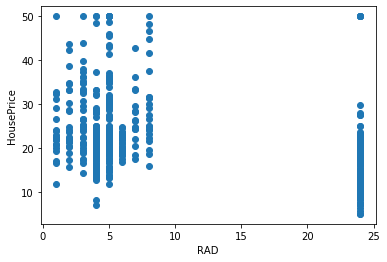

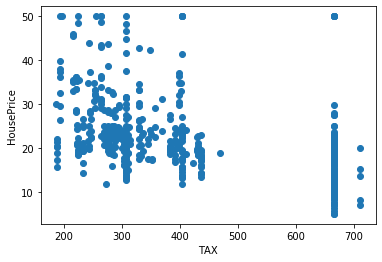

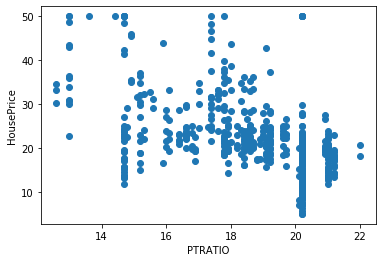

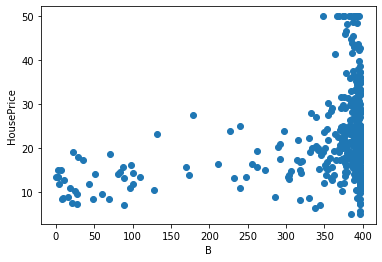

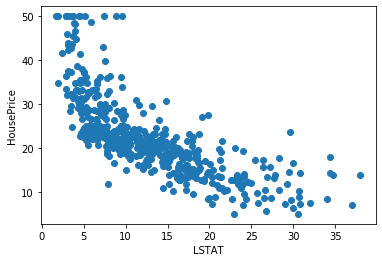

In [66]:
X = boston_df.drop(["MEDV"], axis=1)
y = boston_df[['MEDV']]
for column in X.columns:
    plt.scatter(X[column],y)
    plt.xlabel(column)
    plt.ylabel("HousePrice")    
    plt.show()


#After observing through graph we can see that RM,LSTAT,AGE,CRIM shows some type of linear relationship as here either the HousePrice increase or decrease w.r.t variables but others donot show any such relationship and it is difficult to predict the accurate HousePrice with that data

#Analysing the relation between the variables in X with Y
#Here I am choosing only 4 variables and taking a closer look to watch if there is any linear relationship between the independent variable and dependent variable
#Independent variables I have taken here are:
RM, LSTAT, AGE, CRIM
#Dependent Variable:
House price

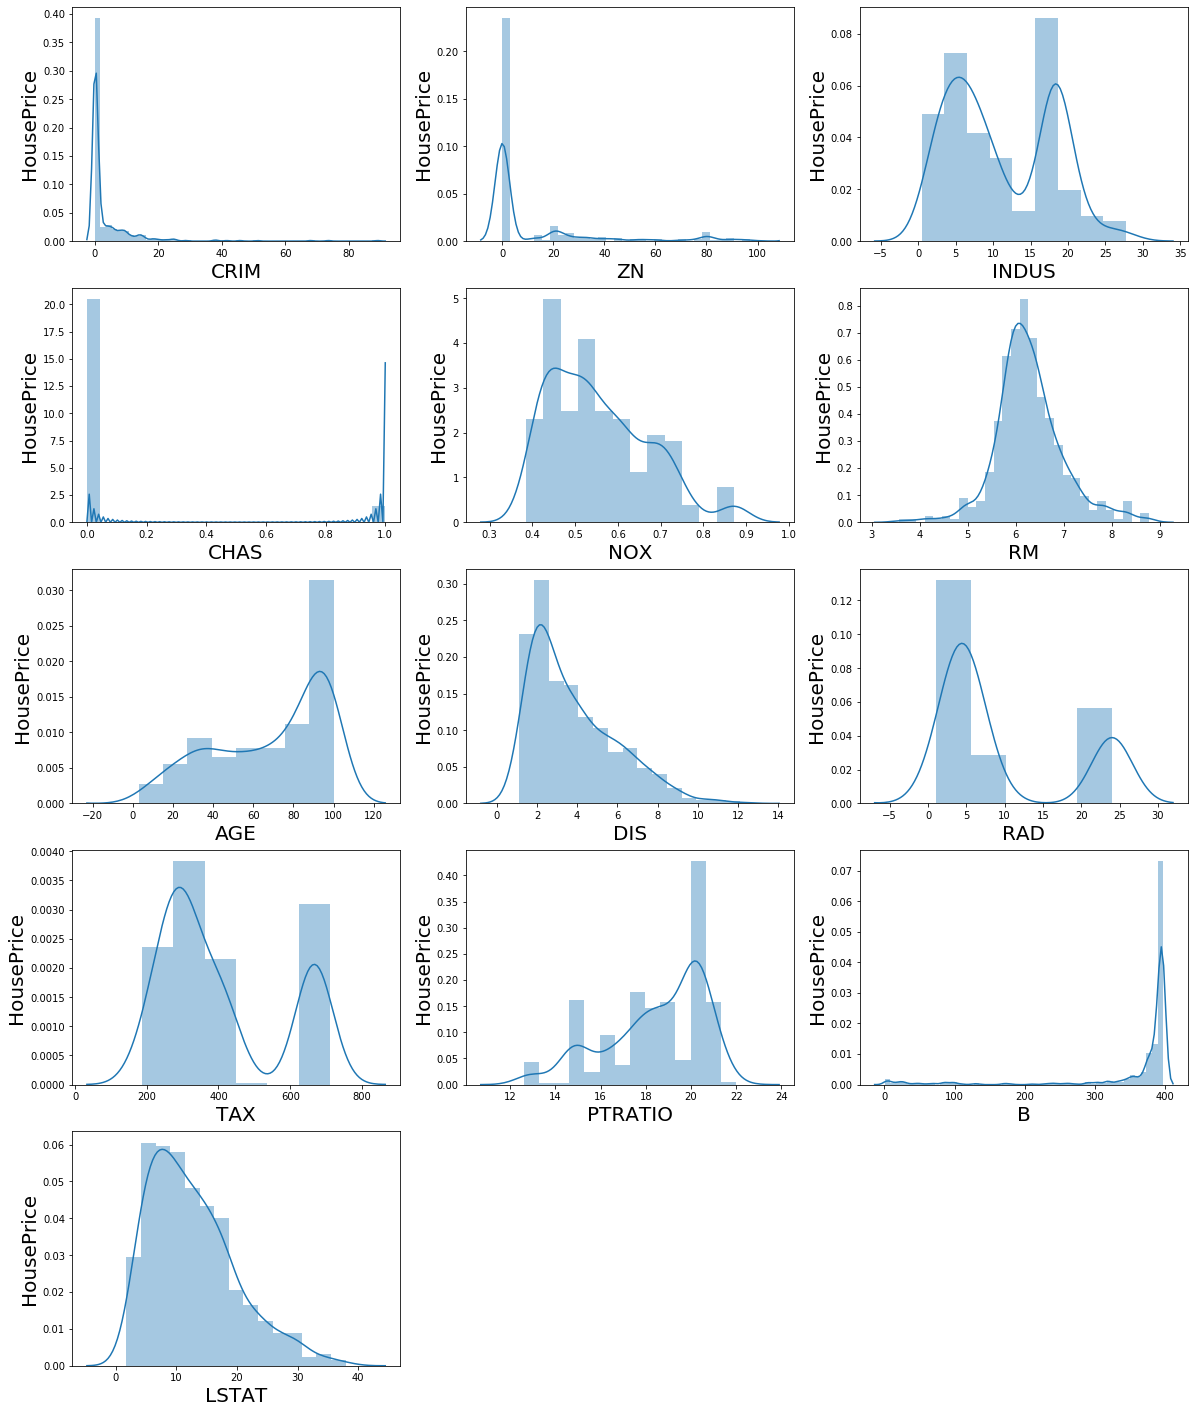

In [67]:
X = boston_df.drop(["MEDV"], axis=1)
y= boston_df['MEDV']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X.columns:
    if plotnumber<=13 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('HousePrice',fontsize=20)
    plotnumber+=1
plt.show()

Text(0, 0.5, 'Frequency')

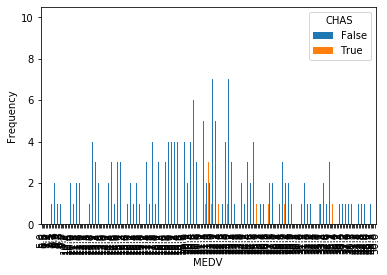

In [68]:
pd.crosstab(boston_df['MEDV'], boston_df['CHAS'].astype(bool)).plot(kind='bar')
plt.ylabel("Frequency")

<class 'numpy.ndarray'>
(2, 2)


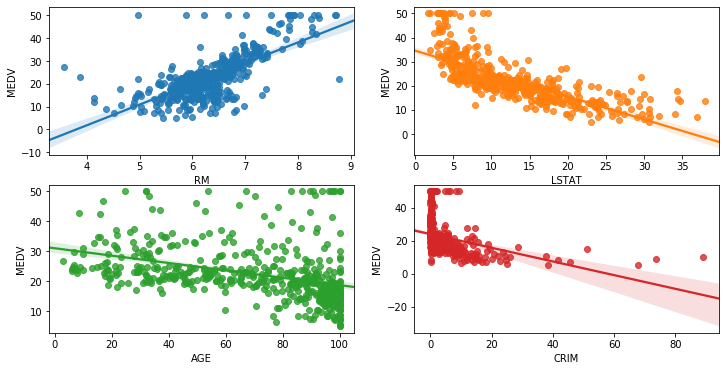

In [69]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 6))
print(type(axs))
print(axs.shape)
sns.regplot(x='RM', y='MEDV', data=boston_df, ax=axs[0][0])
sns.regplot(x='LSTAT', y='MEDV', data=boston_df, ax=axs[0][1])

sns.regplot(x='AGE', y='MEDV', data=boston_df, ax=axs[1][0])
sns.regplot(x='CRIM',y='MEDV', data=boston_df, ax=axs[1][1])

#After observing here we see that RM room size is linaerly related to the HousePrice and LSTAT %lower status of the populaton shows a linear decay  with HousePrice
Also Age and CRIM shows linear decay but in Age the data is scattered around  and CRIM cime rate shows decrease in crime rate with decrease in rate of HousePrice

In [70]:
# calculate the Pearson's correlation between two variables

from scipy.stats import pearsonr
# seed random number generator

# calculate Pearson's correlation
for i in boston_df.columns:
    corr, _ = pearsonr(boston_df[i], boston_df['MEDV'])
    print(i,'Pearsons correlation: %.3f' % corr)

CRIM Pearsons correlation: -0.388
ZN Pearsons correlation: 0.360
INDUS Pearsons correlation: -0.484
CHAS Pearsons correlation: 0.175
NOX Pearsons correlation: -0.427
RM Pearsons correlation: 0.695
AGE Pearsons correlation: -0.377
DIS Pearsons correlation: 0.250
RAD Pearsons correlation: -0.382
TAX Pearsons correlation: -0.469
PTRATIO Pearsons correlation: -0.508
B Pearsons correlation: 0.333
LSTAT Pearsons correlation: -0.738
MEDV Pearsons correlation: 1.000


In [71]:
#MAchine Learning starts here

# Simple Linear Regression

Taking RM No.of rooms for buliding Simple Linear Regression Model

In [72]:
# Use only one feature RM - Average no of rooms
X = boston_df[['RM']]
y = boston_df['MEDV']

from sklearn.linear_model import LinearRegression
slm = LinearRegression()
slm.fit(X, y) # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#predicting the price
Y_pred = slm.predict(X) 
print("Predicted values:\n ",Y_pred[:4])
print("Actual values:\n",boston_df[['RM','MEDV']][:4])

Predicted values:
  [25.17574577 23.77402099 30.72803225 29.02593787]
Actual values:
       RM  MEDV
0  6.575  24.0
1  6.421  21.6
2  7.185  34.7
3  6.998  33.4


In [74]:
#Checking the error using MSE- Mean Squared Error and percent of variation using r2_score
#We have got predicted value of house prices in our test data---Y_pred
#We also have the true value of house prices in test data---Y_test
from sklearn.metrics import mean_squared_error, r2_score
# MSE
print("Mean squared error:", mean_squared_error(y , Y_pred))

# R2 score
r2_slm=r2_score(y, Y_pred)
print("R2 score:",r2_slm)

#Adjusted R2 Score
p=1
n=506
Adj_r2_slm = 1-(1-r2_slm)*(n-1)/(n-p-1)
print("Adjusted R2_score:", Adj_r2_slm)

Mean squared error: 43.60055177116956
R2 score: 0.48352545599133423
Adjusted R2_score: 0.48250070491195196


As we can see here the R2 score is 0.4835, which means only 48.35% of the data can be predicted correctlyby defining the rrom size 'RM' by our model which is very low lets see if we include more no of variables how strong our model could be

In [75]:
#Visualizing the Simple Linear Model

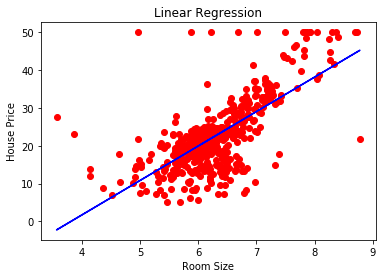

In [76]:
plt.scatter(X, y, color='red')
plt.plot(X , Y_pred, color='blue')
plt.title('Linear Regression')
plt.xlabel('Room Size')
plt.ylabel('House Price')
plt.show()

# Multiple Linear Regression

#Taking RM, CRIM, and LSTAT for Multiple Linear Regression
#Here as the datapoints is in between 0-50 so need of scaling/standardizing the data

In [77]:
X3=boston_df[['RM','LSTAT','CRIM']]
Y=boston_df['MEDV']
X3.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [78]:
X3_train, X3_test,Y3_train,Y3_test=train_test_split(X3,Y,test_size=0.3, random_state=46)

In [79]:
#fit the model
mlm=LinearRegression()
mlm.fit(X3_train,Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#print the coefficients 
print("Coefficients (m):")
pd.DataFrame(mlm.coef_,index=X3.columns)

Coefficients (m):


,0
RM,5.003574
LSTAT,-0.564283
CRIM,-0.097819


In [81]:
#Print the intercept
print("Intercept:", mlm.intercept_)

Intercept: -1.3353927531564445


In [82]:
#Predicting the values
Y3_pred=mlm.predict(X3_test)
Y3_pred

array([19.48104947, 28.55826155, 21.16899839, 15.36959426, 23.3697696 ,
       21.02018868, 26.72384286, 17.31919052, 10.23997525, 22.19886886,
       29.18263502, 19.01080489, 23.91769354, 17.61072576, 21.31681332,
       28.83089747, 29.69942914, 22.79784876, 23.27772751, 26.25041327,
       21.42640099, 29.78770639, 19.09164656, 24.07018963, 16.15703879,
       26.21846199, 38.92934976, 27.34449497, 16.2742525 , 28.68020744,
       34.98475483, 31.41076602, 17.83751638,  7.63357079, 31.45978894,
       30.46559136, 12.13564703, 20.28126864, 24.21483155, 21.27664667,
       28.28814426, 27.15926749, 28.99161289, 14.90629276, 27.70477301,
       18.31809028, 21.03200647, 21.68014407, 11.14835982, 32.22002993,
       21.04410985, 24.1214655 , 22.02535652, 20.28038058, 26.70752807,
       30.8760271 , 32.1328737 , 18.46869247, 16.56172968, 26.42459004,
       32.76177788, 15.91558316, 17.81885361, 16.08594455, 32.14253949,
       18.63379863, 23.58284426, 25.19908684, 27.73235079, 20.66

In [83]:
#We have got predicted value of house prices in our test data---Y2_pred
#We also have the true value of house prices in test data---Y_test
#Checking the MSE and r2_score

#MSE
print("Root mean Squared Error:",mean_squared_error(Y3_test,Y3_pred))

#r2_score
r2_mlm=r2_score(Y3_test,Y3_pred)
print("R2 score:",r2_mlm)

#Adjusted R2 Score
p=3
n=506
Adj_r2_mlm = 1-(1-r2_mlm)*(n-1)/(n-p-1)
print("Adjusted R2_score:", Adj_r2_mlm)

Root mean Squared Error: 23.62142223305211
R2 score: 0.6878988309511358
Adjusted R2_score: 0.686033684522557


As we can see here the R2 score is 0.6878 also Adj R2 score is 68.60 which means 68.78% of the data can be predicted correctly by giving these three variables which are highly positively and correlated and two negatively correlated, which is good.

Also we observed in the coefficient matrix that some of the variables were not or less or negatively correlated with the dependent variable.

Hence it would be better if we check how our model performs if we add few more variables to it.


# Multiple Linear Regression using RM,CRIM,LSTAT,PTRATIO,DIS,CHAS

In [84]:
X6=boston_df[['RM','LSTAT','CRIM','PTRATIO','DIS','CHAS']]
Y=boston_df['MEDV']
X6.head()

,RM,LSTAT,CRIM,PTRATIO,DIS,CHAS
0,6.575,4.98,0.00632,15.3,4.0900,0.0
1,6.421,9.14,0.02731,17.8,4.9671,0.0
2,7.185,4.03,0.02729,17.8,4.9671,0.0
3,6.998,2.94,0.03237,18.7,6.0622,0.0
4,7.147,5.33,0.06905,18.7,6.0622,0.0


In [85]:
X6_train, X6_test,Y6_train,Y6_test=train_test_split(X6,Y,test_size=0.3, random_state=46)

In [86]:
#fit the model
mlm6=LinearRegression()
mlm6.fit(X6_train,Y6_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#print the coefficients 
print("Coefficients (m):")
pd.DataFrame(mlm6.coef_,index=X6.columns)

Coefficients (m):


,0
RM,4.193699
LSTAT,-0.598190
CRIM,-0.096095
PTRATIO,-0.782387
DIS,-0.601276
CHAS,2.654435


In [88]:
#Print the intercept
print("Intercept:", mlm6.intercept_)

Intercept: 20.73231290520559


In [89]:
#Predicting the values
Y6_pred=mlm6.predict(X6_test)
Y6_pred

array([20.57738625, 25.31365853, 20.28736192, 14.69723456, 27.29480983,
       18.35450857, 26.70851313, 16.34676607, 17.38698482, 19.95398779,
       27.62320084, 19.51254255, 22.31674782, 16.45826241, 21.36545175,
       26.17223062, 29.39637151, 24.58701064, 21.49954519, 26.12376549,
       20.29227164, 25.66207602, 20.4796267 , 27.71200764, 17.86243344,
       25.78911886, 38.24090774, 24.98759127, 13.45034934, 28.63625571,
       35.51281745, 29.23400866, 17.27005155,  7.75232938, 33.88357259,
       32.82469213, 14.91272643, 18.01147577, 22.75998692, 20.48253539,
       29.20991166, 24.01288404, 27.4709982 , 14.40687315, 26.05453239,
       23.04484544, 20.65777407, 21.06277382, 11.10574294, 29.02010703,
       24.98394114, 22.71550613, 22.76565015, 19.10173711, 28.46534571,
       31.38061553, 31.71267536, 17.76462201, 15.68927733, 23.46569039,
       32.60330982, 14.92751178, 17.64311786, 15.19863604, 36.41711066,
       17.78600775, 23.23970013, 24.4185183 , 30.92577189, 27.35

In [91]:
#We have got predicted value of house prices in our test data---Y2_pred
#We also have the true value of house prices in test data---Y_test
#Checking the MSE and r2_score

#MSE
print("Root mean Squared Error:",mean_squared_error(Y6_test,Y6_pred))

#r2_score
r2_mlm6=r2_score(Y6_test,Y6_pred)
print("R2 score:",r2_mlm6)

#Adjusted R2 Score
p=6
n=506
Adj_r2_mlm6 = 1-(1-r2_mlm6)*(n-1)/(n-p-1)
print("Adjusted R2_score:", Adj_r2_mlm6)

Root mean Squared Error: 17.376898622419038
R2 score: 0.7704054260157124
Adjusted R2_score: 0.7676447698155004


#Here we can see that RMSE has decreased from 20 to 17 and R2 score has increased, if we include linearly correlated variables. Hence the model is a good fit model, as it fits 77.04 %  data

# Multiple Linear Regression using whole data

In [93]:
#The whole data is only considered to check what RMSE and R2 score we get. Is it getting any better?

In [99]:
# Involving multiple parameters
X_full = boston_df.drop(["MEDV"], axis=1)
y = boston_df['MEDV']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_full,y,test_size=0.3,random_state=46)

In [118]:
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
#Examine all the coefficients
pd.DataFrame(mlr.coef_, index=X_full.columns)

,0
CRIM,-0.122810
ZN,0.052951
INDUS,-0.006819
CHAS,2.900902
NOX,-20.864505
RM,3.657030
AGE,-0.008081
DIS,-1.788211
RAD,0.310070
TAX,-0.011187


In [120]:
#Examine the interecpt
print("Intercept:",mlr.intercept_)

Intercept: 38.40608551441152


In [121]:
#Predicting the model
Y_full_pred=mlr.predict(X_test)
Y_full_pred

array([20.82282393, 23.67832394, 17.70453987, 14.60274007, 24.80373429,
       14.1205111 , 31.27175003, 18.03560182, 13.68525193, 19.04386948,
       32.58042588, 17.61424044, 22.47094344, 13.92467632, 22.07445748,
       24.88255943, 31.2534253 , 22.74237734, 21.41435417, 25.09127328,
       19.45894861, 23.60318186, 20.98307893, 25.86769622, 19.27680528,
       26.04821568, 37.43482144, 24.20707872, 12.85048362, 33.10059676,
       36.86028808, 27.35537907, 17.6446197 ,  7.84360352, 35.12323436,
       35.16487906, 17.40103943, 17.01397518, 20.05679301, 21.88377237,
       30.86849856, 23.38438755, 26.23722059, 16.10676848, 26.88970702,
       24.66660687, 22.23975259, 19.12899154, 14.73723005, 30.67824665,
       22.69956879, 23.19071208, 24.93607848, 20.03885145, 28.94220041,
       32.19970633, 35.86253705, 17.52541665, 17.44797524, 21.12647472,
       32.20033454, 14.23515564, 17.90319785, 14.01099669, 36.15694012,
       19.34753861, 23.68935009, 24.79421971, 31.81535764, 21.25

In [122]:
#Checking the error
#rmse
print("Mean Squared Error:", mean_squared_error(Y_test,Y_full_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_full_pred))

#r2score
r2_mlr=r2_score(Y_test,Y_full_pred)
print("R2_Score:", r2_mlr)

#Adjusted r2_score
p=12
n=506
Adj_r2_mlr = 1-(1-r2_mlr)*(n-1)/(n-p-1)
print("Adjusted R2_score:", Adj_r2_mlr)

Mean Squared Error: 16.139622460029415
Variance score: 0.79
R2_Score: 0.7867531011433246
Adjusted R2_score: 0.7815625072563468


# Plotting R2_score and Adj_r2_score for different number of predictors

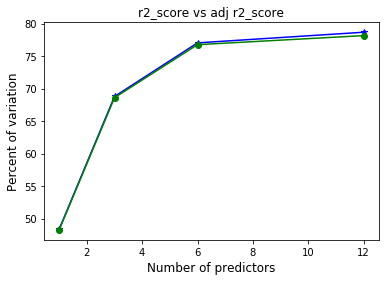

In [159]:
p=[1,3,6,12]
r2=[r2_slm*100 , r2_mlm*100 , r2_mlm6*100 , r2_mlr*100]

adj_r2=[Adj_r2_slm*100 , Adj_r2_mlm*100 , Adj_r2_mlm6*100 , Adj_r2_mlr*100]

plt.plot(p,r2,'b',label='r2_line',marker='*')
plt.plot(p,adj_r2,'g',label='adj_r2_line',marker='o')

plt.xlabel('Number of predictors', fontsize=12)
plt.ylabel('Percent of variation', fontsize=12)

plt.title('r2_score vs adj r2_score')
plt.show()

Here we can see as the number of predictors grow the change in r2_score and Adj_r2_score , also we can see both R2_score and Adj R2 score chnages with change in no of variables but there is a very slight change from 76-78%. 
So we can take that our model accuracy as 76-78% by having only 6 variables

# Creating Lasso regression model

In [126]:
# Lasso Regularization using RM,LSTAT, CRIM independent variables
from sklearn.linear_model import LassoCV
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X6_train, Y6_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [127]:
alpha=lasscv.alpha_
alpha

0.0008960197613344079

In [128]:
lasso_reg = LassoCV(alpha)
lasso_reg.fit(X6_train, Y6_train)

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.0008960197613344079,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [162]:
lasso_reg.score(X6_test, Y6_test)

0.7617376839084906

Here also we achieved the same accuracy in between 76-78%

In [132]:
#Lasso Regression for Full data
lasscv_full= LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv_full.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [133]:
alpha_new=lasscv_full.alpha_
alpha_new

0.001030204988608845

In [134]:
lasso_reg_full = LassoCV(alpha_new)
lasso_reg_full.fit(X_train, Y_train)

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001030204988608845,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [160]:
lasso_reg_full.score(X_test, Y_test)

0.7731332712948099

Here also we achieved the same accuracy in between 76-78%

# Model evaluation using Cross Validation for full data

In [146]:
scores=cross_val_score(LinearRegression(), X_full,Y,scoring='r2',cv=5)
print(scores)
print(scores.mean())

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.3532759243958768


# Model evaluation using Cross validation for RM,CRIM,LSTAT,PTRATIO,DIS,CHAS

In [154]:
scores=cross_val_score(LinearRegression(),X6,Y,scoring='r2', cv=5)
print(scores)
print(scores.mean())

[ 0.72348539  0.6597807   0.59208274  0.22746649 -0.02251662]
0.43605974149664456


In [163]:
#So overall our model with 6 variables RM,CRIM,LSTAT,PTRATIO,DIS,CHAS will give 76-78% of accuracy as seen by doing lasso 